
# Predictive Modeling Approach for Sleep Disorder using Sleep Health and Life style properties

# Introduction

This notebook aims to explore the data, clean it, visualize it, and offer intuitive conclusions. No model will be created, except for identifying correlations between parameters or response variables. 
This serves as an excellent starting point for those seeking a comprehensive understanding of the data for further analysis or model creation. However check out the summary before reading through as it provides some problems found in the dataset.

---
As a master's student in data science, this is my first contribution to Kaggle. It would make my day if you could give this a **up vote**. All **feedback** for future contributions is highly appreciated..

In [38]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Simple exploration and visualization of data

In [39]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv').drop('Person ID',axis=1)

In [40]:
df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [41]:
missing_data = df.isna().sum()
missing_data_df = pd.DataFrame(missing_data).reset_index()
missing_data_df.columns = ['Column', 'Missing']
missing_data_df

,Column,Missing
0,Gender,0
1,Age,0
2,Occupation,0
3,Sleep Duration,0
4,Quality of Sleep,0
5,Physical Activity Level,0
6,Stress Level,0
7,BMI Category,0
8,Blood Pressure,0
9,Heart Rate,0


Only slight modifications needed

## Numerical

### Fixing the inconsistency in the **Blood pressure** category
Looking at the data the bloodpressure category does not seem to be in a correct format. Changing it into two numeric categores low_pressure and high_pressure.

In [42]:
df["High_pressure"] = 0
df["Low_pressure"] = 0

for i, val in enumerate(df["Blood Pressure"]):
    j = 0
    
    while val[j] != "/":
        j += 1
        continue
        
    df.loc[i, "High_pressure"] = int(val[:j])
    df.loc[i, "Low_pressure"] = int(val[(j+1):])

df.drop("Blood Pressure", axis=1)
print("Successfully created numeric categories Low_pressure and high_pressure, droped Blood pressure")

Successfully created numeric categories Low_pressure and high_pressure, droped Blood pressure


In [43]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,High_pressure,Low_pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


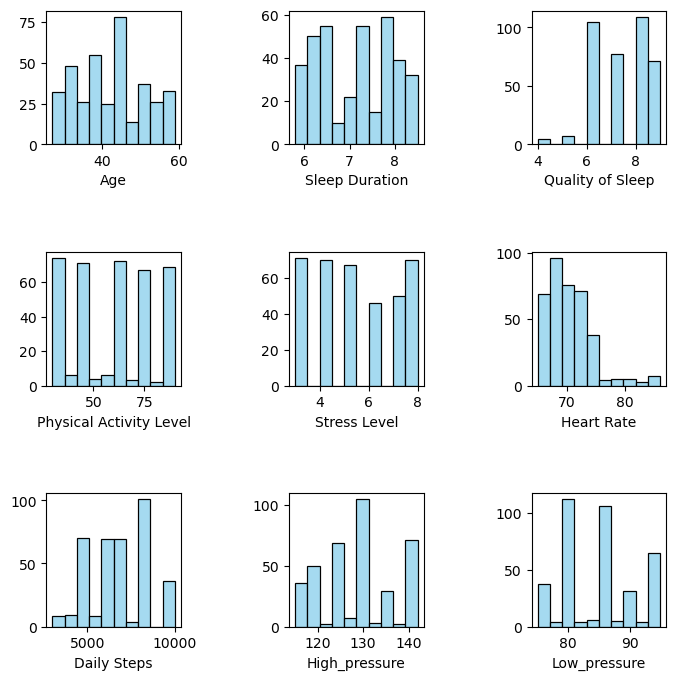

In [44]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

numeric = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "High_pressure", "Low_pressure"]

for i, cat in enumerate(numeric):
    sns.histplot(df[cat], bins=10, color='skyblue', ax=axs[int(i/3), i%3]).set_ylabel("")    

plt.show()

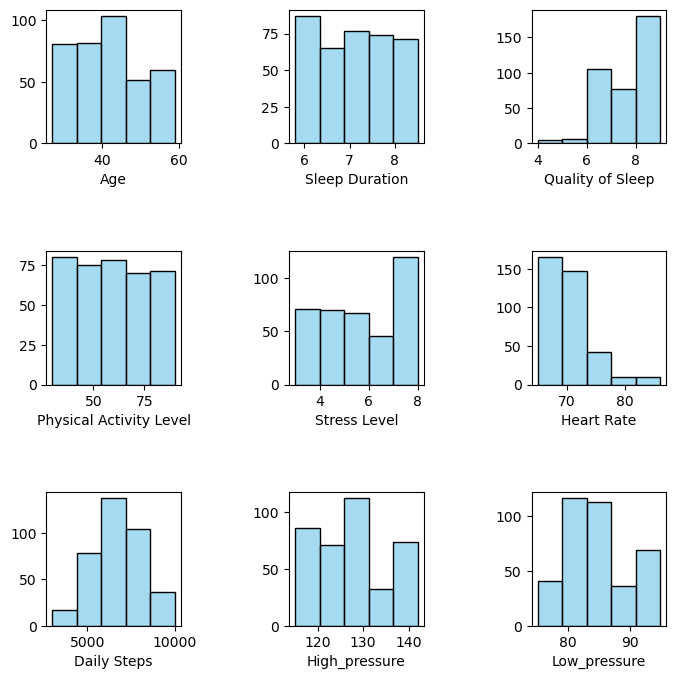

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

for i, cat in enumerate(numeric):
    sns.histplot(df[cat], bins=5, color='skyblue', ax=axs[int(i/3), i%3]).set_ylabel("")    

plt.show()

### Analysis
- **Quality of Sleep**: Appears to be somewhat exponentially distributed, skewed towards higher values.
- **Age**: Appears to be somewhat normally distributed, no outliers observed.
- **Sleep Duration**: Uniformly distributed.
- **Physical Activity Level**: Uniformly distributed.
- **Stress Level**: The distribution is skewed towards high stress levels.
- **Heart Rate**: Appears to be exponentially distributed, skewed towards lower heart rates.
- **Daily Steps**: Appears somewhat normally distributed within the dataset.
- **High Pressure**: Appears somewhat normally distributed but could conform to another type of distribution.
- **Low Pressure**: Also appears somewhat normally distributed. Interestingly, the distribution between high and low pressure is not identical.

There are **peculiarities** with the quality of sleep, stress level, and physical activity level where they seem to be spaced out (possibly due to issues with the questions asked). The same **sporadic pattern** is observed in blood pressure and steps, which needs further explanation, it will likely provide problem confirming any distributions. No apparent outliers can be detected in the data, and the data appears to be already cleaned. All parameters seem intuitively related to sleep quality. No parameter can be discarded, and hence a subsequent analysis of their statistical relevance is warranted.

## Categorical

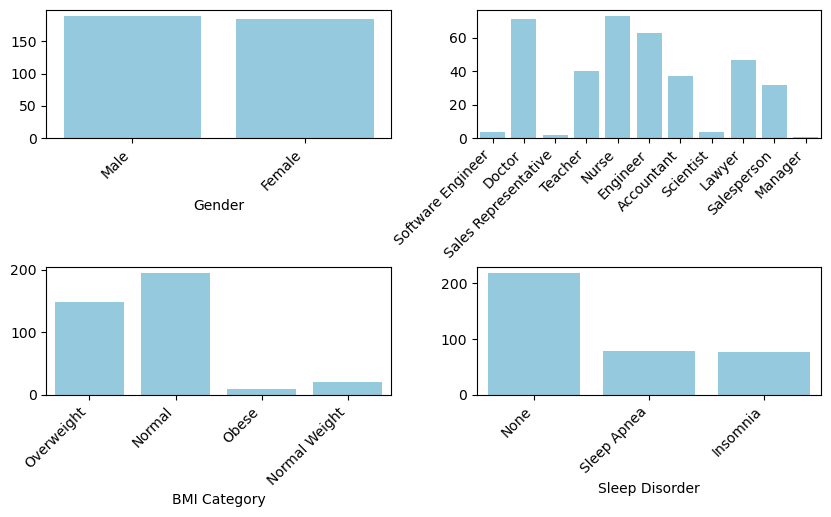

In [46]:
categorical = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

fig, axs = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.25, hspace=1)

for i, cat in enumerate(categorical):
    sns.countplot(x=cat, data=df, color='skyblue', ax=axs[int(i/2), i%2]).set_ylabel("") 
    plt.xticks(rotation=45) 

for ax in axs.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')
#plt.tight_layout()
plt.show()



### Parameters and Analysis

- **Gender (binary-class)**: Displays an even distribution and could influence sleep.
- **Occupation (multi-class)**: Certain occupations do not have sufficient representation to draw any conclusions. One possible approach is to remove all occupations with a count lower than 20 and replace them with an "unknown" class.
- **BMI Category (multi-class)**: There's a balanced distribution between overweight and normal categories. "Normal Weight" appears to be a typo, which will be reclassified as "Normal", and we will add "Obese" to the "Overweight" category because lack of samples.
- **Sleep Disorder (multi-class)**: The distribution is evenly split between individuals with and without sleep disorders, though the disorders themselves are divided between sleep apnea and insomnia. This might be a potential response variable.

### Transforming Categorical Parameters

- Simplify the BMI by combining the "Normal Weight" category with "Normal". Furthermore, we'll incorporate "Obese" into the "Overweight" category, since these categories are likely closely related and a classification with about 5 values might risk overfitting.
- For the occupation category, we'll streamline by removing classes with fewer than 20 instances and merging them into a new class. It's crucial to note that this class won't serve as a baseline as it inherently carries a bias based on the original classes.

In [47]:
## Changing the Normal weight to Normal

df.loc[df["BMI Category"] == "Normal Weight", "BMI Category"] = "Normal"
df.loc[df["BMI Category"] == "Obese", "BMI Category"] = "Overweight"

print("Successfully changed all the 'Normal Weight' to 'Normal'")

Successfully changed all the 'Normal Weight' to 'Normal'


In [48]:
## Simplifying occupation

cut_off = 20
new_label = "Unknown"

# Get the value counts
count_data = df['Occupation'].value_counts()
to_replace = count_data[count_data < cut_off].index

# Replace the labels
df['Occupation'] = df['Occupation'].replace(to_replace, new_label)

print(f"Successfully changed all occupation below {cut_off} to {new_label}")


Successfully changed all occupation below 20 to Unknown


# Feature Analysis in Relation to Response Variables

We will be using sleep duration and sleep disorder as response variables. Incorporating both a numeric and a categorical response variable will enhance the intrigue of the analysis.

**Numeric Values**

1. Construct a correlation matrix (this, however, only reveals linear correlation).
2. Create scatterplots against sleep duration.
3. Utilize split-boxplots to discern the differences in means between various levels.
4. Examine normality using a QQ-plot and the Shapiro-Wilk test.

**Categorical Values**

1. Calculate the mean sleep duration for each level.
2. Employ ANOVA analysis to determine if the means vary significantly.
3. Use stacked bar plots to examine the relationship with sleep disorder.

<AxesSubplot:>

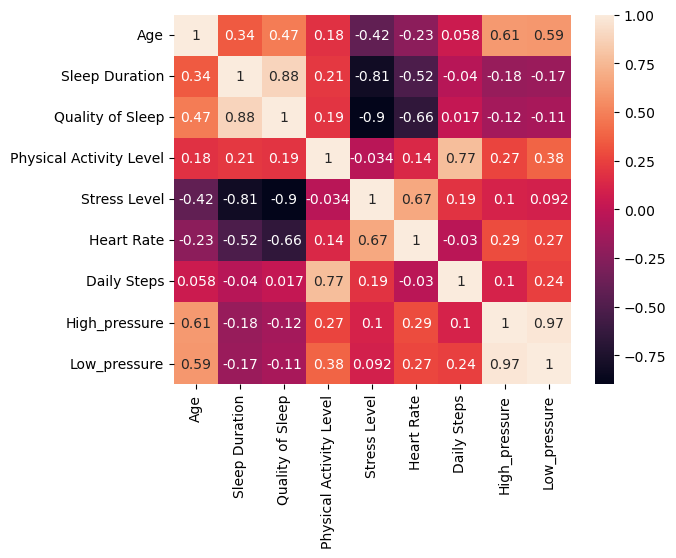

In [49]:
import seaborn as sns

# Find correlation matrix
sns.heatmap(df.corr(), annot=True)


The correlation matrix provides some interesting insights.

- Stress level and sleep duration show a strong correlation, as do stress level and sleep quality.
- High and low blood pressure are extremely correlated. I will proceed with low_pressure. The use of the harmonic mean might produce a better parameter.

### Plotting against sleep duration

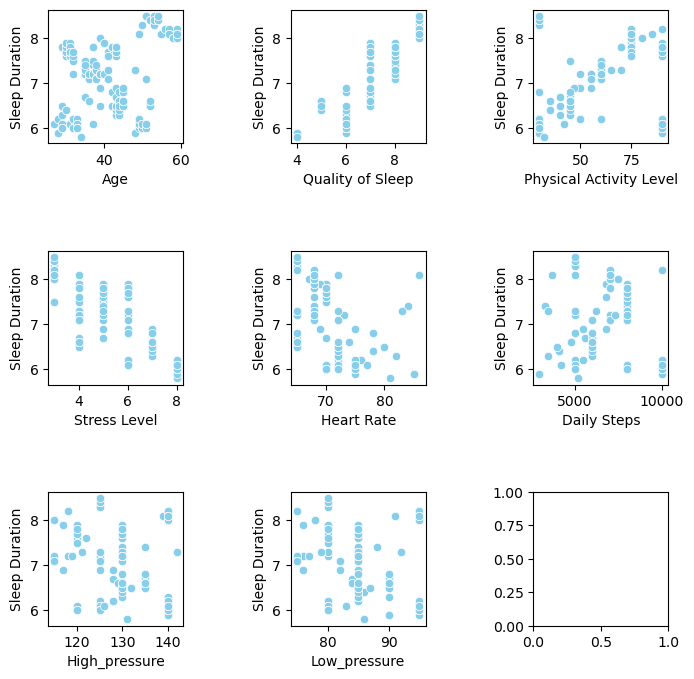

In [50]:
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

numeric_x = ["Age", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "High_pressure", "Low_pressure"]

for i, cat in enumerate(numeric_x):
    sns.scatterplot(x = cat, y= "Sleep Duration",data=df, color='skyblue', ax=axs[int(i/3), i%3])    

plt.show()

**Results from Scatterplot**

- Physical Activity Level appears linearly dependent but has a significant number of outliers in the left top and right bottom corners. What could be the reason?
- As the heart rate increases, the sleep duration decreases, though we should not jump to conclusions about causality as it's likely the other way around.
- The relationships between most variables and sleep duration appear somewhat linear. However, there's an issue with the graph where dots overlap, resulting in these points being weighted higher.

I will not eliminate any parameters based on these results. Instead, I'll employ a regularization technique when building the model to exclude irrelevant parameters.

In [51]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,High_pressure,Low_pressure
0,Male,27,Unknown,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,Male,28,Unknown,5.9,4,30,8,Overweight,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Unknown,5.9,4,30,8,Overweight,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


In [52]:
#label encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Gender', 'Occupation', 'BMI Category','Sleep Disorder','Blood Pressure']

# Iterate over each column
for column in categorical_columns:
    # Encode the categorical column
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
print('encoded')

encoded


In [54]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,High_pressure,Low_pressure,Gender_encoded,Occupation_encoded,BMI Category_encoded,Sleep Disorder_encoded,Blood Pressure_encoded
0,Male,27,Unknown,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,1,7,1,1,11
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,1,1,0,1,9
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,1,1,0,1,9
3,Male,28,Unknown,5.9,4,30,8,Overweight,140/90,85,3000,Sleep Apnea,140,90,1,7,1,2,22
4,Male,28,Unknown,5.9,4,30,8,Overweight,140/90,85,3000,Sleep Apnea,140,90,1,7,1,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,0,4,1,2,23
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,0,4,1,2,23
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,0,4,1,2,23
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95,0,4,1,2,23


In [77]:
X=df.drop(['Gender', 'Occupation', 'BMI Category','Sleep Disorder','Blood Pressure'],axis=1)

In [79]:
X.values

array([[27. ,  6.1,  6. , ...,  1. ,  1. , 11. ],
       [28. ,  6.2,  6. , ...,  0. ,  1. ,  9. ],
       [28. ,  6.2,  6. , ...,  0. ,  1. ,  9. ],
       ...,
       [59. ,  8.1,  9. , ...,  1. ,  2. , 23. ],
       [59. ,  8.1,  9. , ...,  1. ,  2. , 23. ],
       [59. ,  8.1,  9. , ...,  1. ,  2. , 23. ]])

In [80]:
y=df['Sleep Disorder_encoded'].values

In [81]:
y

array([1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,

In [83]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_test

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,High_pressure,Low_pressure,Gender_encoded,Occupation_encoded,BMI Category_encoded,Sleep Disorder_encoded,Blood Pressure_encoded
329,53,8.5,9,30,3,65,5000,125,80,0,2,0,1,9
33,31,6.1,6,30,8,72,5000,125,80,1,1,0,1,9
15,29,6.0,6,30,8,70,8000,120,80,1,1,0,1,6
325,53,8.5,9,30,3,65,5000,125,80,0,2,0,1,9
57,32,6.0,6,30,8,72,5000,125,80,1,1,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,36,7.2,8,60,4,68,7000,115,75,0,0,0,0,0
195,43,6.5,6,45,7,72,6000,130,85,1,5,1,0,15
312,52,8.4,9,30,3,65,5000,125,80,0,2,0,1,9
292,50,6.1,6,90,8,75,10000,140,95,0,4,1,2,23


In [61]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 2, 2])

In [62]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9733333333333334


In [63]:
#confusion matrix

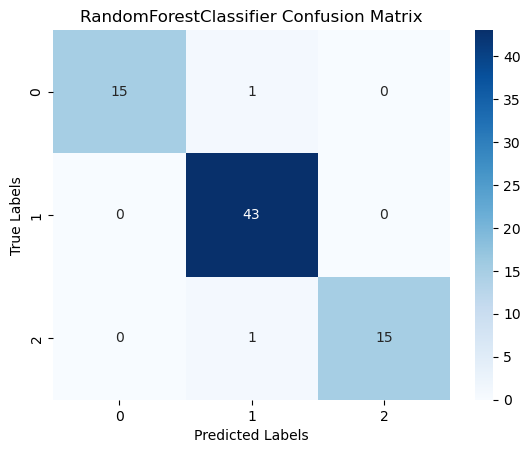

In [64]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

In [65]:
# Compute the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.96      1.00      0.98        43
           2       1.00      0.94      0.97        16

    accuracy                           0.97        75
   macro avg       0.99      0.96      0.97        75
weighted avg       0.97      0.97      0.97        75



In [66]:
# Creating the decision tree classifier
clf = DecisionTreeClassifier()

# Training the classifier
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)
#accuracy
acc=accuracy_score(y_test, y_pred)*100
print("Accuracy:",acc)
# Computing the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
# Computing the classification report
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm1)
print("\nClassification Report:")
print(report)

Accuracy: 100.0
Confusion Matrix:
[[16  0  0]
 [ 0 43  0]
 [ 0  0 16]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        16

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



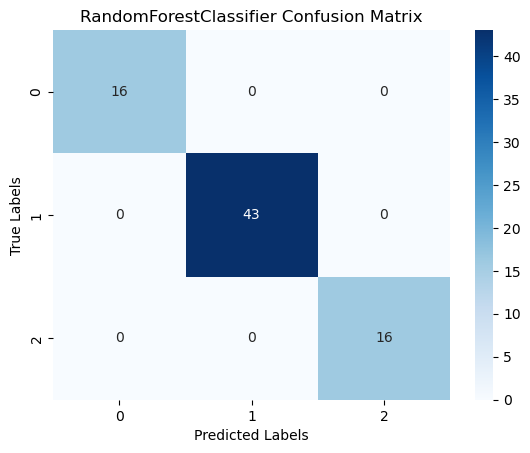

In [67]:
# Create a heatmap of the confusion matrix
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

In [68]:
y_pred_new = clf.predict(X_test)

# Print the predicted labels
print("Predicted Labels:", y_pred_new)

Predicted Labels: [1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 2 1 1 1 2 2 1 1
 1 1 1 1 2 2 2 1 1 1 1 0 1 2 2 2 2 0 2 2 2 2 1 1 0 1 1 0 1 0 1 1 1 0 0 1 2
 2]


In [69]:
#dataset = pd.read_csv(filename)
A='Normal'
B='Insomnia'
C='Sleep Apnea'
predict = clf.predict(X_test)
for i in range(len(predict)):
    if predict[i] == 0:
        print("{} :              Sleep Disorder Predicted as:{} ".format(df.iloc[i,:],A))
    elif predict[i]== 1:
        print("{} :              Sleep Disorder Predicted as:{}".format(df.iloc[i, :],B))
    else:
        print("{} :              Sleep Disorder Predicted as:{} ".format(df.iloc[i,:],C))

Gender                           Male
Age                                27
Occupation                    Unknown
Sleep Duration                    6.1
Quality of Sleep                    6
Physical Activity Level            42
Stress Level                        6
BMI Category               Overweight
Blood Pressure                 126/83
Heart Rate                         77
Daily Steps                      4200
Sleep Disorder                   None
High_pressure                     126
Low_pressure                       83
Gender_encoded                      1
Occupation_encoded                  7
BMI Category_encoded                1
Sleep Disorder_encoded              1
Blood Pressure_encoded             11
Name: 0, dtype: object :              Sleep Disorder Predicted as:Insomnia
Gender                       Male
Age                            28
Occupation                 Doctor
Sleep Duration                6.2
Quality of Sleep                6
Physical Activity Level        60

In [70]:
from sklearn.model_selection import train_test_split

# Assuming you have your features 'X' and labels 'y'

# Split the data into training and temporary sets (80% for training, 20% for temporary)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% for validation, 50% for testing)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Training set size:", len(X_train_temp))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Training set size: 299
Validation set size: 37
Test set size: 38


In [74]:
# Creating the decision tree classifier
clf = DecisionTreeClassifier()

# Training the classifier
clf.fit(X_train_temp, y_train_temp)

# Making predictions on the test set
y_pred = clf.predict(X_test)
#accuracy
acc=accuracy_score(y_test, y_pred)*100
print("Accuracy:",acc)
# Computing the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
# Computing the classification report
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm1)
print("\nClassification Report:")
print(report)

Accuracy: 100.0
Confusion Matrix:
[[ 7  0  0]
 [ 0 23  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [75]:
from sklearn.metrics import accuracy_score

# Assuming you have a trained model called 'model' and validation data 'X_val' and 'y_val'

# Make predictions on the validation set
y_pred = clf.predict(X_val)

# Calculate the accuracy score
accuracy = accuracy_score(y_val, y_pred)

# Print the validation accuracy
print("Validation Accuracy:", accuracy)


Validation Accuracy: 1.0
